In [74]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# use latex
from matplotlib import rc
rc("text", usetex=False)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression using the Normal Equation

To find the value of ${\vec{\theta}}$ that minimizes the cost function, there is a *closed-form solution* (i.e., a mathematical equation that gives the result directly), called the Normal Equation.

$$
\vec{\theta}' = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^{T} \mathbf{y}
$$

where

- $\vec{\theta}'$ is the value of ${\vec{\theta}}$ that minimizes the cost function.
- $\mathbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$; $m$ is the number of instances (training examples).


Let's generate some linear-looking data to test this equation:

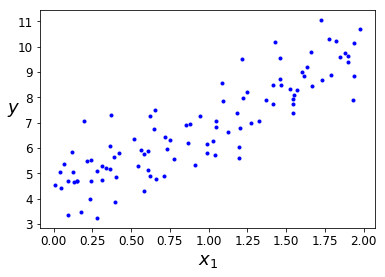

In [96]:
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# our training set
m_instances = 100

X = 2*np.random.rand(m_instances, 1)            # notice that the range of the independent variable x is [0, 2]
y = 4 + 3*X + np.random.randn(m_instances, 1)   # notice that we use randn instead of rand to add noise from a normal distribution

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

----

**Note** There are a few subtle things from the above code that are worth mentioning:
    

1. Notice that the range of the independent variable x is [0, 2] because we are using `2` in the following expression:

```
X = 2*np.random.rand(m_instances, 1)
```

2. Also, notice that `X` is sampled from a uniform distribution by using `np.random.rand`:

From the documentation:

```
np.random.rand? 

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.
```

3. When creating `y`, we also add random numbers. Although, they are sampled from a normal distribution (`np.random.randn`), not a uniform distribution:

```python
y = 4 + 3*X + np.random.randn(m_instances, 1)
```

From the documentation:

```
np.random.randn?

Return a sample (or samples) from the "standard normal" distribution.
```
---

In [95]:
# print a few instances
print(X[:5], "\n...\n", X[-5:])
print(y[:5], "\n...\n", y[-5:])

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]] 
...
 [[0.98759119]
 [1.04546566]
 [0.85508204]
 [0.05083825]
 [0.21578285]]
[[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]] 
...
 [[6.14696329]
 [7.05929527]
 [6.90639808]
 [4.42920556]
 [5.47453181]]


Now, let's compute $\vec{\theta}'$ using the Normal Equation. We will use the `inv()` function from Numpy's Linear Algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication.

In [80]:
# first, add the bias x0 = 1 to each instance
X_b = np.c_[np.ones((m_instances, 1)), X]

# check the first values
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [99]:
# now, find the best value of theta
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

# print results
print("theta0: %.4f (bias or intercept)" % best_theta[0])
print("theta1: %.4f" % best_theta[1])

theta0: 4.2151 (bias or intercept)
theta1: 2.7701


----
**Note** Above we use `np.linalg.inv` to compute the inverse of a matrix $\mathbf{X}$. Although, this method will fail if `X` is noninvertible (singular). In that case, you can use `np.linalg.pinv`, that computes the pseudoinverse of $\mathbf{X}$, denoted as $\mathbf{X}^{+}$; specifically the Moore-Penrose pseudoinverse.  

The pseudoinverse itself is computed using a standard matrix factorization technique called **Singular Value Decomposition** (SVD) that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$ (see `numpy.linalg.svd()`). The pseudoinverse is computed as:

$$
\mathbf{X}^T = \mathbf{V} \mathbf{\Sigma}^{+} \mathbf{U}^T.
$$
 
----

Let's review the shape of each matrix mutitplication:

```python
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

# operations                 # shapes
A = X_b.T                    (2, 100)
B = dot(X_b.T, X_b)          (2, 100) * (100, 2) = (2, 2)  
C = inv(dot(A))              (2, 2)
D = dot(C, A)                (2,   2) * (2, 100) = (2, 100)
E = dot(D, y)                (2, 100) * (100, 1) = (2, 1)
```

That is, the result has a shape of `(2, 1)`.

In [94]:
# print shapes of X and y
print("shape of X_b", X_b.shape)
print("shape of X_b.T", X_b.T.shape)
print("shape of y", y.shape)
print("shape of best_theta", best_theta.shape)

shape of X_b (100, 2)
shape of X_b.T (2, 100)
shape of y (100, 1)
shape of best_theta (2, 1)


(my notes) Now you can make predictions using $\vec{\theta}'$ (`best_theta`). Remember, we are using a linear model for predicting the value of $y$ as follows:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

The above equation can be expressed using a vectorized form as follows:

$$
\mathbf{y} = \mathbf{X} \vec{\theta}
$$

In [107]:
# prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_new = X_new_b.dot(best_theta)            # vectorized form

print("prediction")
print(y_new)

prediction
[[4.21509616]
 [9.75532293]]


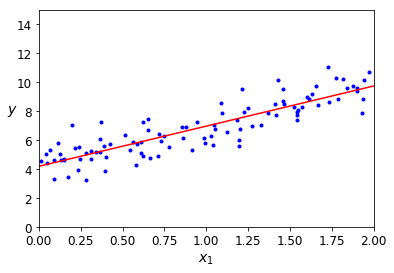

In [87]:
# previous plot
%matplotlib inline
plt.plot(X, y, "b.")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0)

# prediction
plt.plot(X_new, y_new, color="red")
plt.axis([0, 2, 0, 15])
plt.show()

Now, let's use Scikit-learn for performing the same linear regression:

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y);

In [103]:
# print results
print("theta0: %.4f (bias or intercept)" % lin_reg.intercept_)
print("theta1: %.4f" % lin_reg.coef_)

theta0: 4.2151 (bias or intercept)
theta1: 2.7701


In [108]:
# prediction
y_new = lin_reg.predict(X_new)

print("prediction")
print(y_new)

prediction
[[4.21509616]
 [9.75532293]]


 U,S,V = np.linalg.svd(X_b)
_,S_pinv, _ = np.linalg.svd(S)

In [110]:
X_pinv = V.dot(S)

array([[-8.51341424e-02,  6.16132489e-02, -8.96233597e-02, ...,
        -1.01302130e-01, -1.16727468e-01, -1.13563842e-01],
       [-1.45246051e-01, -1.23527170e-01, -9.95358962e-02, ...,
         2.25873105e-03,  1.36709232e-01,  1.09134404e-01],
       [-1.22427086e-01, -5.32463752e-02,  9.84685201e-01, ...,
        -8.30989388e-03,  9.42195632e-04, -9.55341209e-04],
       ...,
       [-9.06636945e-02,  4.45826201e-02, -7.24818749e-03, ...,
         9.90677854e-01, -1.20614338e-02, -1.14996256e-02],
       [-4.87105580e-02,  1.73795308e-01,  3.40620546e-03, ...,
        -1.06591304e-02,  9.70763352e-01, -2.54265328e-02],
       [-5.73148437e-02,  1.47294718e-01,  1.22106630e-03, ...,
        -1.03849245e-02, -2.57141351e-02,  9.77429775e-01]])

In [113]:
U, S, V = np.linalg.svd(X)

In [116]:
S_inv = np.linalg.inv(np.linalg(S.diagonal()))
X_pinv = V.T.dot(S_inv).dot(U.T)

ValueError: diag requires an array of at least two dimensions

In [ ]:
contina usando

- el metodo de lstm
- svd